## First order response specifications

Consider the general first oder system:

$$ G(s) = \frac{C(s)}{R(s)} = \frac{a}{s+a} $$ 

subject to the unit step input:

$$ R(s) = \frac{1}{s} $$

The laplace of the output response is simply:

$$ C(s) = R(s) G(s)  = \frac{a}{s(s+a)} $$

We can use partial fraction expansion and the inverse Laplace transform to find:

$$ c(t) = 1 - e^{-a t} $$

## Response specifications

### Rise Time

Time for response to go from 10% to 90% of the final value

$$ T_R = \frac{2.31}{a} - \frac{0.11}{a} = \frac{2.2}{a} $$

### Settling time

Time for system to remain within 2% ( or 5%) of the final value

$$ T_S = \frac{4}{a} $$

## Experimentally determine a transfer function

Suppose we have a complicated/unknown system that we wish to analyze. 
It's too expensive/complicated to model it directly, so we'll analyze it's response to a unit step input. 

We'll assume that system is modelled as a first order:

$$ G(s) = \frac{K}{s+a} $$

The output response to a unit step input will then be:

$$ C(s) = R(s) G(s) = \frac{K/a}{s} - \frac{K/a}{s+a} $$

We can determine the time constant, $ a$ by finding the time to reach $ \approx 63% $ of the final value.

$$ a = \frac{1}{t_c} $$

Using the steady state value we can determine $K$

$$ ss = \frac{K}{a} $$

Rise time - 0.02 sec
Settling time - 0.04 sec


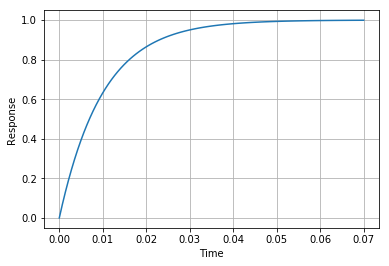

In [1]:

import numpy as np
from scipy import signal
import matplotlib.pylab as plt

K = 100
a = 100

Tr = 2.2 /a
Ts = 4.0 / a

print("Rise time - %3.2f sec" % Tr)
print("Settling time - %3.2f sec" % Ts)

sys = signal.TransferFunction(K, [1,a])
t,resp = signal.step(sys)
plt.plot(t,resp)
plt.xlabel('Time')
plt.ylabel('Response')
plt.grid(True)
plt.show()

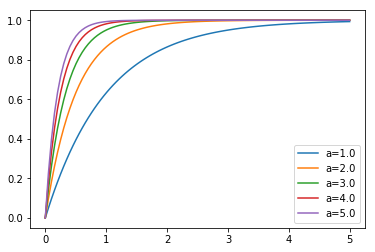

In [3]:
## Lets make a plot of varying time constant
K = 1
t = np.linspace(0, 5, 100)
u = np.ones_like(t)
a_vec = np.linspace(1, 5, 5)

fig, ax = plt.subplots()
for a in a_vec:
    tout, resp, x = signal.lsim(([K*a],[1, a]), u, t)
    ax.plot(tout, resp, label='a={}'.format(a))

plt.legend()
plt.show()